In [4]:
import tensorflow as tf
from tensorflow import keras

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
len(x_train)

60000

In [10]:
len(x_test)

10000

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

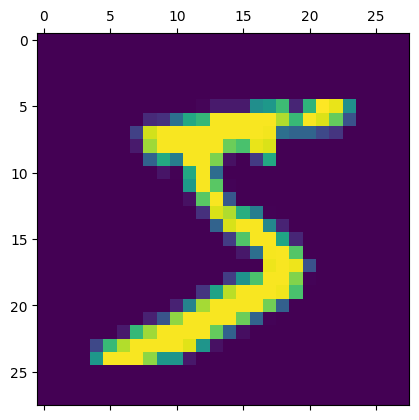

In [14]:
plt.matshow(x_train[0])

In [15]:
x_train = x_train / 255
x_test = x_test / 255

In [16]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [21]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=11)

Epoch 1/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6563 - accuracy: 0.8329 - val_loss: 0.3629 - val_accuracy: 0.9008
Epoch 2/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3414 - accuracy: 0.9045 - val_loss: 0.2947 - val_accuracy: 0.9195
Epoch 3/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2911 - accuracy: 0.9174 - val_loss: 0.2627 - val_accuracy: 0.9290
Epoch 4/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2600 - accuracy: 0.9266 - val_loss: 0.2398 - val_accuracy: 0.9334
Epoch 5/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2364 - accuracy: 0.9335 - val_loss: 0.2190 - val_accuracy: 0.9394
Epoch 6/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2173 - accuracy: 0.9390 - val_loss: 0.2053 - val_accuracy: 0.9430
Epoch 7/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2013 - accuracy: 0.9438 - val_loss: 0.1921 - val_accuracy:

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss= %.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1550 - accuracy: 0.9554
Loss= 0.155
Accuracy=0.955


<function matplotlib.pyplot.show(close=None, block=None)>

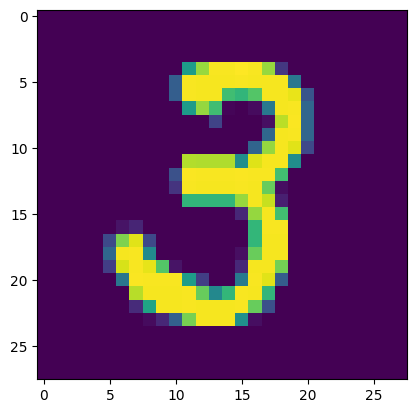

In [23]:
n = random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show

In [24]:
predicted_val = model.predict(x_test)
print("handwritten number in the image is = %d" %np.argmax(predicted_val[n]))

313/313 [==============================] - 1s 2ms/step
handwritten number in the image is = 3


In [25]:
history.history??

Type:        dict
String form: {'loss': [0.6563330292701721, 0.3414444029331207, 0.2910618185997009, 0.26000434160232544, 0.23638224601745605, 0.21734249591827393, 0.20133166015148163, 0.18795610964298248, 0.17645040154457092, 0.1662488430738449, 0.15711283683776855], 'accuracy': [0.8329166769981384, 0.904533326625824, 0.9173666834831238, 0.9265833497047424, 0.933483362197876, 0.9390333294868469, 0.9437999725341797, 0.9477333426475525, 0.9512333273887634, 0.9545000195503235, 0.9562666416168213], 'val_loss': [0.36288708448410034, 0.294674277305603, 0.26265615224838257, 0.23980583250522614, 0.2189803421497345, 0.20530444383621216, 0.19213640689849854, 0.17928573489189148, 0.17075607180595398, 0.16303706169128418, 0.1549544632434845], 'val_accuracy': [0.9007999897003174, 0.9194999933242798, 0.9290000200271606, 0.9333999752998352, 0.9394000172615051, 0.9430000185966492, 0.9463000297546387, 0.9487000107765198, 0.9509000182151794, 0.9538999795913696, 0.9553999900817871]}
Length:      4
Docst

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

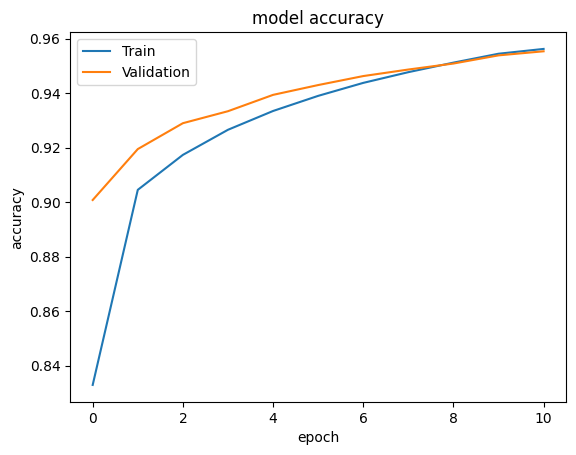

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

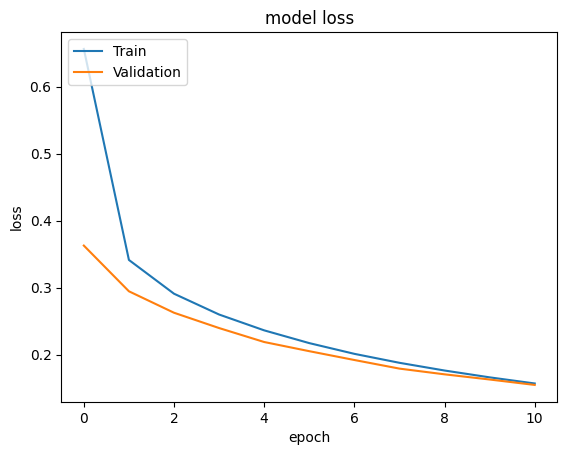

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show